## Testing Modelling with knn

In [48]:
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
import seaborn as sns
# Classification metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# Import the script from different folder
import sys  
sys.path.append('../scripts')

import file_utilities as fu

## ProSE embeddings


Initiaize arguments

In [3]:
# Define arguments for the file_paths function
task = 'acp'
ptmodel = 'prose'
file_base = 'train'
model = 'prose_dlm'
emb_layer = 'layer'
pool = 'avg'  


### ProSE DLM model - prose_dlm

- **Pooling Operation:  `avg`**

### Train Dataset

Run the script `file_paths` to prepare paths. The default root data folder is *../data*.

In [4]:
# Prepare paths
path_pt, _, path_fa = fu.file_paths(ptmodel, task, file_base, model, pool)
print('', path_fa, '\n', path_pt)

 ../data/acp/train_data.fa 
 ../data/acp/prose/train/acp_train_dlm_avg


In [5]:
X_train, y_train, sequence_id_train = fu.read_embeddings(path_fa, path_pt, pool, emb_layer)

Shape of embeddings: 		(1378, 6165)
Length of target label list:	1378
Length of sequential ids list:	1378


### Test Dataset

In [6]:
# Update arguments
file_base = 'test'
# Prepare paths
path_pt, _, path_fa = fu.file_paths(ptmodel, task, file_base, model, pool)
print('', path_fa, '\n', path_pt)

 ../data/acp/test_data.fa 
 ../data/acp/prose/test/acp_test_dlm_avg


In [7]:
X_test, y_test, sequence_id_test = fu.read_embeddings(path_fa, path_pt, pool, emb_layer)

Shape of embeddings: 		(344, 6165)
Length of target label list:	344
Length of sequential ids list:	344


In [10]:
# If shuffle is needed
# from sklearn.utils import shuffle

# X_sh, y_sh = shuffle(X_train, y_train, random_state=11)

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

### PCA

In [24]:
num_pca_components = 60
pca = PCA(num_pca_components)
X_train_s_pca = pca.fit_transform(X_train_s)

Text(0, 0.5, 'PCA second principal component')

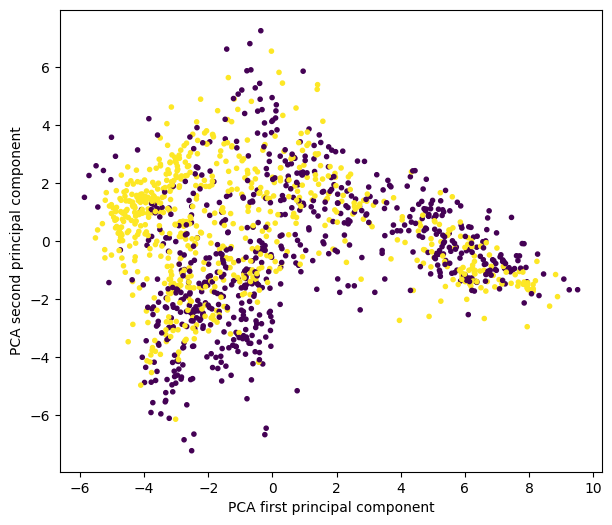

In [29]:
fig_dims = (7, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sc = ax.scatter(X_train_s_pca[:,0], X_train_s_pca[:,1], c=y_train, marker='.')
ax.set_xlabel('PCA first principal component')
ax.set_ylabel('PCA second principal component')
#plt.colorbar(sc, label='Variant Effect')

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
pipe = Pipeline(
    steps = (
        ('scaler', MinMaxScaler()),
        ('knc', KNeighborsClassifier())
    )
)

In [64]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('knc', KNeighborsClassifier())])

In [65]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('knc', KNeighborsClassifier())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'knc': KNeighborsClassifier(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'knc__algorithm': 'auto',
 'knc__leaf_size': 30,
 'knc__metric': 'minkowski',
 'knc__metric_params': None,
 'knc__n_jobs': None,
 'knc__n_neighbors': 5,
 'knc__p': 2,
 'knc__weights': 'uniform'}

In [89]:
y_pred = pipe.predict(X_test)

In [67]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,

In [68]:
accuracy_score(y_test, y_pred)

0.7267441860465116

In [69]:
confusion_matrix(y_test, y_pred)

array([[122,  50],
       [ 44, 128]])

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       172
           1       0.72      0.74      0.73       172

    accuracy                           0.73       344
   macro avg       0.73      0.73      0.73       344
weighted avg       0.73      0.73      0.73       344



In [71]:
pipe.score(X_train, y_train)

0.8207547169811321

In [72]:
pipe.score(X_test, y_test)

0.7267441860465116

In [73]:
print(np.array(y_test)[:10])
print(y_pred[:10])

[0 0 0 1 0 0 1 1 1 0]
[1 0 0 1 0 0 1 1 0 1]


In [75]:
pipe.predict(X_test[55:56])

array([1])

### Pipeline with PCA

In [84]:
num_pca_components = 60

In [85]:
pipe_pca = Pipeline(
    steps = (
        ('scaler', MinMaxScaler()),
        ('pca', PCA(num_pca_components)),
        ('knc', KNeighborsClassifier())
    )
)

In [86]:
pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=60)),
                ('knc', KNeighborsClassifier())])

In [87]:
pipe_pca.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('pca', PCA(n_components=60)),
  ('knc', KNeighborsClassifier())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'pca': PCA(n_components=60),
 'knc': KNeighborsClassifier(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 60,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'knc__algorithm': 'auto',
 'knc__leaf_size': 30,
 'knc__metric': 'minkowski',
 'knc__metric_params': None,
 'knc__n_jobs': None,
 'knc__n_neighbors': 5,
 'knc__p': 2,
 'knc__weights': 'uniform'}

In [90]:
y_pred_pca = pipe_pca.predict(X_test)

In [91]:
accuracy_score(y_test, y_pred_pca)

0.7151162790697675

In [92]:
confusion_matrix(y_test, y_pred_pca)

array([[123,  49],
       [ 49, 123]])

In [93]:
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       172
           1       0.72      0.72      0.72       172

    accuracy                           0.72       344
   macro avg       0.72      0.72      0.72       344
weighted avg       0.72      0.72      0.72       344



In [94]:
pipe_pca.score(X_train, y_train)

0.8287373004354136

In [95]:
pipe_pca.score(X_test, y_test)

0.7151162790697675

In [96]:
print(np.array(y_test)[:10])
print(y_pred_pca[:10])

[0 0 0 1 0 0 1 1 1 0]
[1 0 0 1 0 0 1 1 0 1]


In [97]:
pipe_pca.predict(X_test[55:56])

array([1])

### Creating classifier path

In [76]:
# check what to use joblib(.sav), PyTorch (.pt), Keras(.h5) or something else

clf = ['rf', 'lr', 'xgb', 'dl', 'knn']

tail = os.path.split(path_pt)[1].split('_')
tail.pop(1)

model_name = f'{"_".join(tail)}_{clf[4]}.sav'
model_path = os.path.join('../saved_models', model_name)
model_path

'../saved_models/acp_dlm_avg_knn.sav'

In [77]:
import joblib

joblib.dump(pipe, model_path)

['../saved_models/acp_dlm_avg_knn.sav']

In [79]:
knn_saved = joblib.load(model_path)
print(knn_saved.score(X_test, y_test))

0.7267441860465116


In [80]:
knn_saved.predict(X_test[55:56])

array([1])

In [81]:
sequence_id_test[55:56]

['Protein_seq_ts0056']

In [ ]:
GVGDIFRKIVSTIKNVV

In [82]:
y_test[55:56], y_pred[55:56]

([0], array([1]))

In [83]:
X_test[55:56]

array([[ 0.        ,  0.05882353,  0.05882353, ..., -0.06649267,
         0.03789606,  0.0419427 ]], dtype=float32)

In [63]:
X_test_s[55:56]

array([[0.        , 0.0882353 , 0.2647059 , ..., 0.35692528, 0.41596144,
        0.55292535]], dtype=float32)

# 